In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix , precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier 




In [2]:
features = ["ID","Diagnosis","radius1","texture1","perimeter1","area1","smoothness1","compactness1","concavity","concave_points1","symmetry1",
            "fractal_dimension1","radius2","texture2","perimeter2","area2","smoothness2","compactness2","concavity2","concave_points2","symmetry2",
            "fractal_dimension2","radius3","texture3","perimeter3","area3","smoothness3","compactness3","concavity3","concave_points3","symmetry3","fractal_dimension3"
            ]
data = pd.read_csv('wdbc.data',names = features)
data.head()

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
data.shape

(569, 32)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  569 non-null    int64  
 1   Diagnosis           569 non-null    object 
 2   radius1             569 non-null    float64
 3   texture1            569 non-null    float64
 4   perimeter1          569 non-null    float64
 5   area1               569 non-null    float64
 6   smoothness1         569 non-null    float64
 7   compactness1        569 non-null    float64
 8   concavity           569 non-null    float64
 9   concave_points1     569 non-null    float64
 10  symmetry1           569 non-null    float64
 11  fractal_dimension1  569 non-null    float64
 12  radius2             569 non-null    float64
 13  texture2            569 non-null    float64
 14  perimeter2          569 non-null    float64
 15  area2               569 non-null    float64
 16  smoothne

In [5]:
data = data.dropna(how= 'any',axis = 0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  569 non-null    int64  
 1   Diagnosis           569 non-null    object 
 2   radius1             569 non-null    float64
 3   texture1            569 non-null    float64
 4   perimeter1          569 non-null    float64
 5   area1               569 non-null    float64
 6   smoothness1         569 non-null    float64
 7   compactness1        569 non-null    float64
 8   concavity           569 non-null    float64
 9   concave_points1     569 non-null    float64
 10  symmetry1           569 non-null    float64
 11  fractal_dimension1  569 non-null    float64
 12  radius2             569 non-null    float64
 13  texture2            569 non-null    float64
 14  perimeter2          569 non-null    float64
 15  area2               569 non-null    float64
 16  smoothne

In [6]:
data.head(-4)

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,15.30,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.1048,0.2250,0.08321
561,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,11.92,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.0000,0.1566,0.05905
562,925622,M,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,...,17.52,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.2356,0.4089,0.14090
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,24.29,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.2542,0.2929,0.09873


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  569 non-null    int64  
 1   Diagnosis           569 non-null    object 
 2   radius1             569 non-null    float64
 3   texture1            569 non-null    float64
 4   perimeter1          569 non-null    float64
 5   area1               569 non-null    float64
 6   smoothness1         569 non-null    float64
 7   compactness1        569 non-null    float64
 8   concavity           569 non-null    float64
 9   concave_points1     569 non-null    float64
 10  symmetry1           569 non-null    float64
 11  fractal_dimension1  569 non-null    float64
 12  radius2             569 non-null    float64
 13  texture2            569 non-null    float64
 14  perimeter2          569 non-null    float64
 15  area2               569 non-null    float64
 16  smoothne

In [8]:
data = data.drop("ID", axis="columns")
data.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
radius1,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture1,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter1,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area1,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness1,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness1,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave_points1,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry1,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension1,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


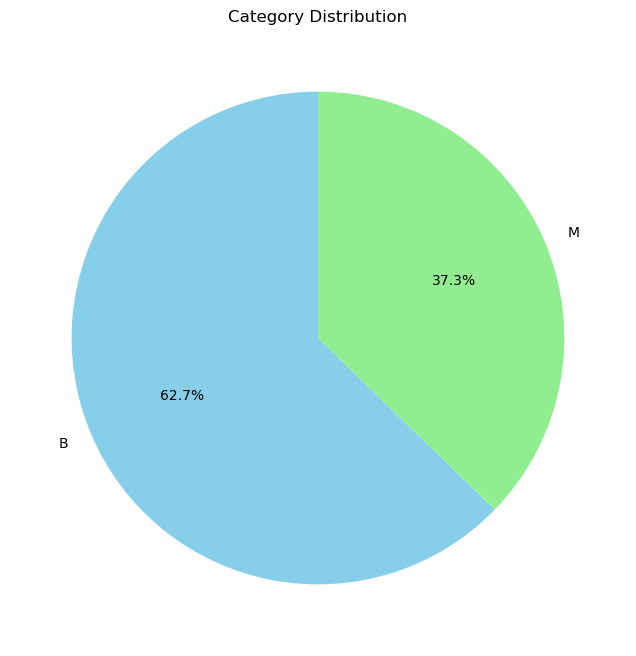

In [9]:
data['Diagnosis'] = pd.Categorical(data['Diagnosis'], categories=['M', 'B'])

# Countplot (ideal for categorical frequency)
frequency = data['Diagnosis'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(frequency, labels=frequency.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'coral'])
plt.title('Category Distribution')
plt.show()

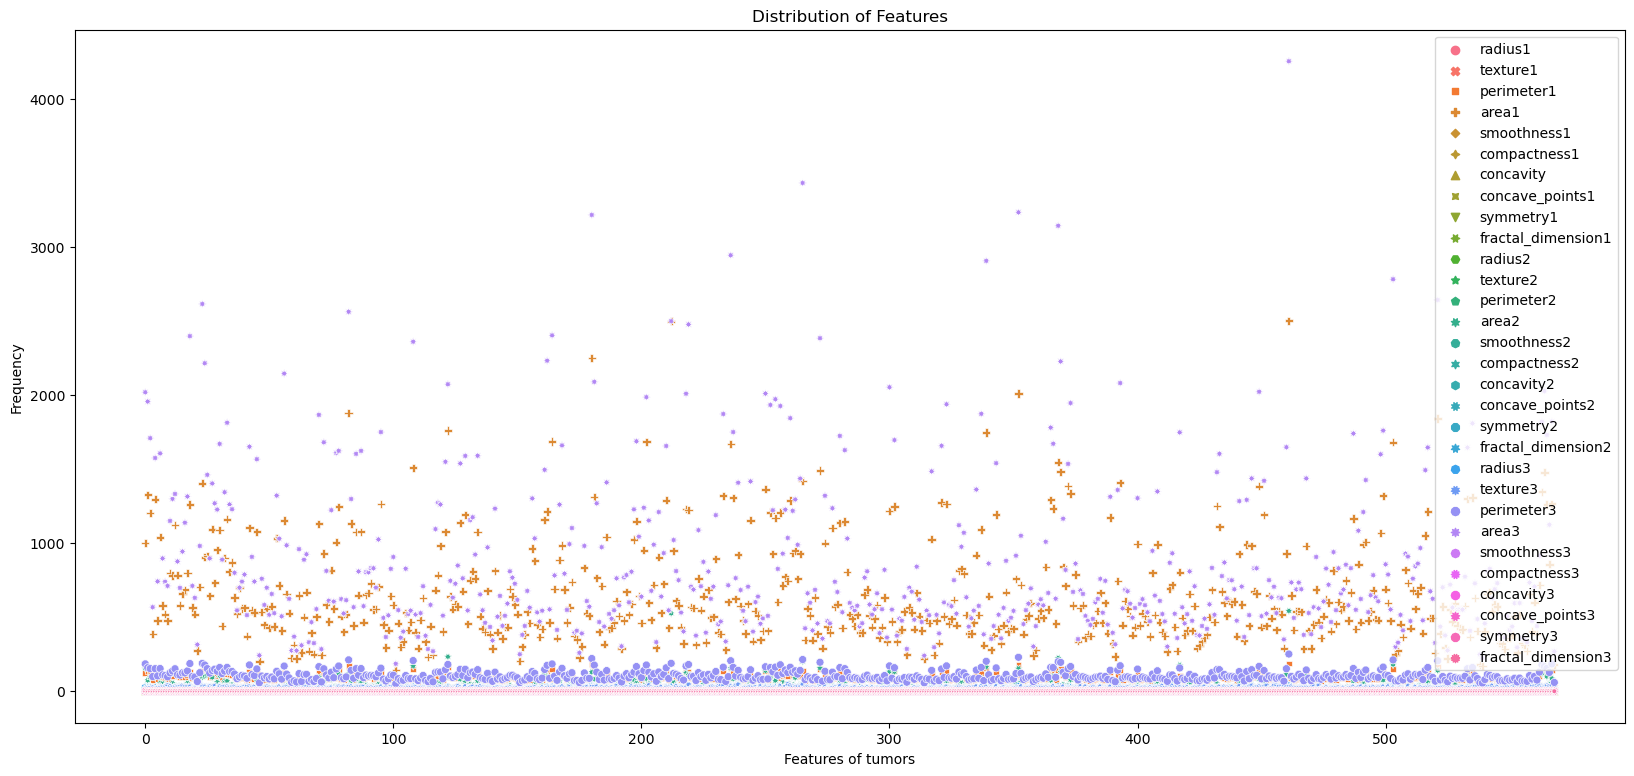

In [10]:
plt.figure(figsize = (20,9))
sns.scatterplot(data )
plt.title('Distribution of Features')
plt.xlabel('Features of tumors')
plt.ylabel('Frequency')
plt.show()

c:\Users\kunal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kunal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\kunal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\kunal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

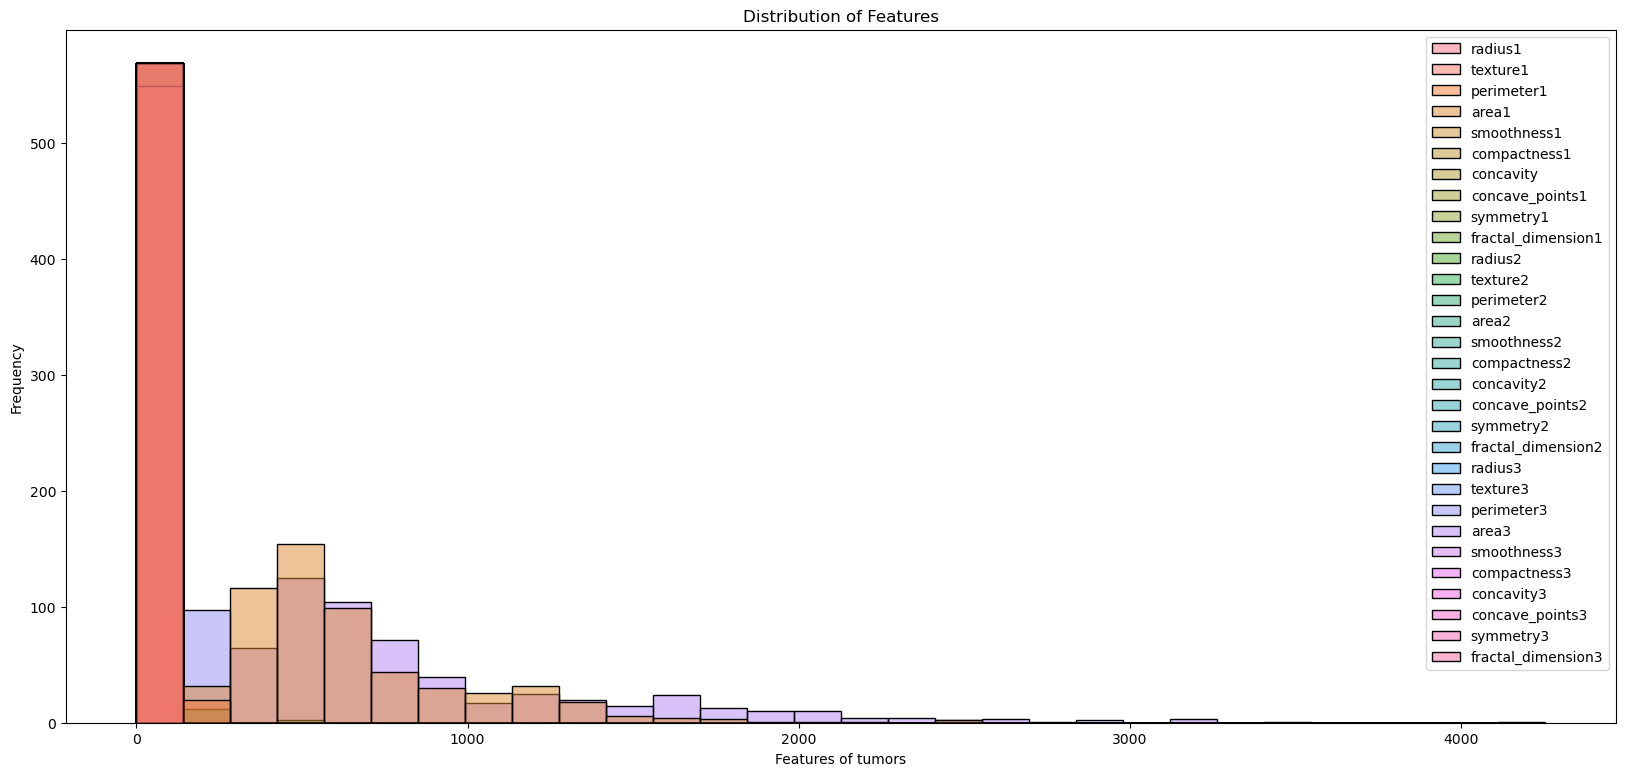

In [11]:
plt.figure(figsize = (20,9))
sns.histplot(data , bins = 30 )
plt.title('Distribution of Features')
plt.xlabel('Features of tumors')
plt.ylabel('Frequency')
plt.show()


In [12]:

# for column in data.columns:
#     plt.figure(figsize=(8, 5))
#     sns.histplot(data[column], kde=True, bins=10, color='blue')
#     plt.title(f'Distribution of {column}')
#     plt.xlabel(column)
#     plt.ylabel('Frequency')
#     plt.grid(axis='y', linestyle='--', alpha=0.7)
#     plt.show()

c:\Users\kunal\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


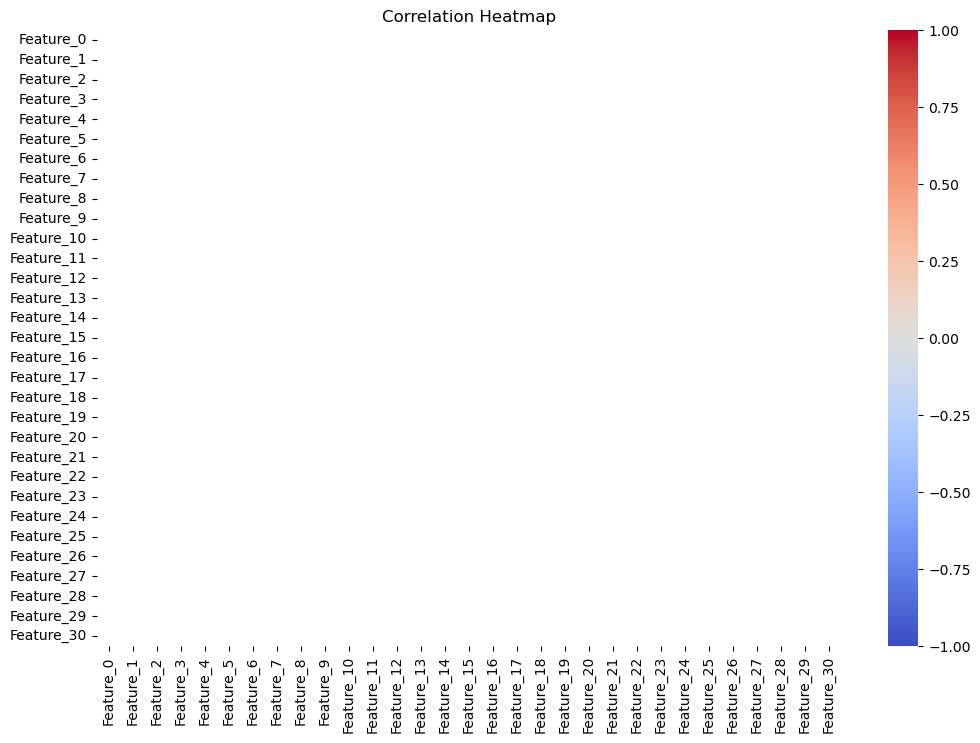

In [17]:
scaled_df = pd.DataFrame(data, columns=[f'Feature_{i}' for i in range(data.shape[1])])

corr_matrix = scaled_df.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [18]:
X = data.drop("Diagnosis",axis = "columns")
Y = data["Diagnosis"]

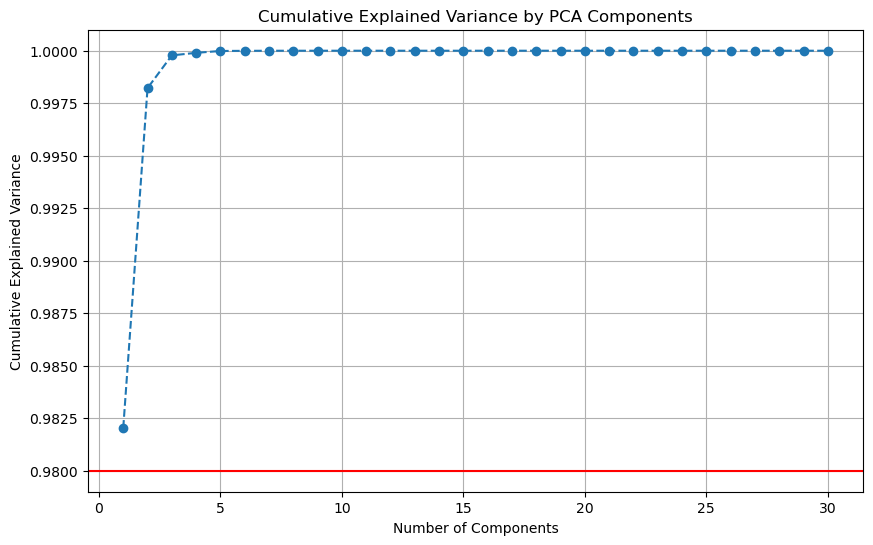

Ideal number of components to retain 98% variance: 1


In [19]:
pca = PCA()
X_pca = pca.fit_transform(X)

# # Calculate cumulative variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# # Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.axhline(y=0.98, color='r', linestyle='-')  # 95% threshold line
plt.grid(True)
plt.show()

# # Find the number of components needed to retain 95% of the variance
n_components_98 = np.argmax(cumulative_variance >= 0.98) + 1
print(f"Ideal number of components to retain 98% variance: {n_components_98}")

In [ ]:
# pca = PCA(n_components = 2)
# X = pca.fit_transform(X_pca)
# X.shape

In [20]:



x_train, x_test, y_train, y_test = train_test_split(X,Y, random_state = 42)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train) 
x_test_scaled = scaler.transform(x_test)
x_train_scaled


array([[-0.34913849, -1.43851335, -0.41172595, ..., -0.91671059,
        -0.92508585, -0.80841115],
       [-0.20468665,  0.31264011, -0.13367256, ...,  1.43655962,
         1.14955889,  1.56911143],
       [-0.32931176, -0.21507235, -0.31739376, ..., -0.7237126 ,
         0.53496977, -0.61934827],
       ...,
       [ 0.04739597, -0.56293662, -0.06529202, ..., -1.23262438,
        -0.68282718, -1.261137  ],
       [-0.04040808,  0.09966199, -0.03151368, ...,  1.08847951,
         0.48944465,  1.26159953],
       [-0.5502381 ,  0.31264011, -0.6040977 , ..., -0.59582424,
        -0.29911546, -0.82948141]])

In [ ]:
x_train_scaled


array([[-0.34913849, -1.43851335, -0.41172595, ..., -0.91671059,
        -0.92508585, -0.80841115],
       [-0.20468665,  0.31264011, -0.13367256, ...,  1.43655962,
         1.14955889,  1.56911143],
       [-0.32931176, -0.21507235, -0.31739376, ..., -0.7237126 ,
         0.53496977, -0.61934827],
       ...,
       [ 0.04739597, -0.56293662, -0.06529202, ..., -1.23262438,
        -0.68282718, -1.261137  ],
       [-0.04040808,  0.09966199, -0.03151368, ...,  1.08847951,
         0.48944465,  1.26159953],
       [-0.5502381 ,  0.31264011, -0.6040977 , ..., -0.59582424,
        -0.29911546, -0.82948141]])

In [21]:
model1 = LogisticRegression()
model1.fit(x_train_scaled,y_train)
predictions = model1.predict(x_test_scaled)
accuracy1 = np.mean(predictions == y_test)
print(f"Accuracy : {accuracy1*100:.2f}%") 

Accuracy : 97.90%


In [22]:
model = GradientBoostingClassifier(random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy : {accuracy*100:.4f}%") 

Accuracy : 95.8042%


In [23]:
best_k = 1
best_accuracy = 0


for k in range(1, 31):
    # Initialize KNN classifier with current k value
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_scaled, y_train)
    
    
    y_pred = knn.predict(x_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    
    # Update best_k and best_accuracy if the current accuracy is greater
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"\nBest k: {best_k} with accuracy: {best_accuracy*100:.4f}%")





Best k: 9 with accuracy: 97.2028%


In [ ]:
model2 = KNeighborsClassifier(n_neighbors=9)
                             
model2.fit(x_train_scaled, y_train)
y_pred = model2.predict(x_test_scaled)
accuracy2 = accuracy_score(y_test, y_pred)
conf_mat2 = confusion_matrix(y_test,y_pred)
class_rep2 = classification_report(y_test,y_pred)

print(f'Accuracy : {accuracy2*100:.2f}%')
print(f'confusion_matrix : \n{conf_mat2}')
print(f'class_rep : \n{class_rep2}')

Accuracy : 97.20%
confusion_matrix : 
[[87  2]
 [ 2 52]]
class_rep : 
              precision    recall  f1-score   support

           B       0.98      0.98      0.98        89
           M       0.96      0.96      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

best_n_estimators = 80
best_accuracy = 0 

for k in range(80,151):

    rf = RandomForestClassifier(n_estimators=k , random_state=42)
    rf.fit(x_train_scaled,y_train)
    y_pred = rf.predict(x_test_scaled)

    accuracy = accuracy_score(y_test,y_pred)
    
    # Update best_k and best_accuracy if the current accuracy is greater
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_estimators = k

print(f"\nBest No. of Estimators : {best_n_estimators} with accuracy: {best_accuracy*100:.4f}%")

    

    




Best No. of Estimators : 80 with accuracy: 96.5035%


In [ ]:
model3 = RandomForestClassifier(n_estimators=80)
model3.fit(x_train_scaled, y_train)
y_pred = model3.predict(x_test_scaled)
accuracy3 = accuracy_score(y_test, y_pred)
conf_mat3 = confusion_matrix(y_test,y_pred)
class_rep3 = classification_report(y_test,y_pred)

print(f'Accuracy : {accuracy3*100:.2f}%')
print(f'confusion_matrix : \n{conf_mat3}')
print(f'class_rep : \n{class_rep3}')


Accuracy : 97.20%
confusion_matrix : 
[[88  1]
 [ 3 51]]
class_rep : 
              precision    recall  f1-score   support

           B       0.97      0.99      0.98        89
           M       0.98      0.94      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



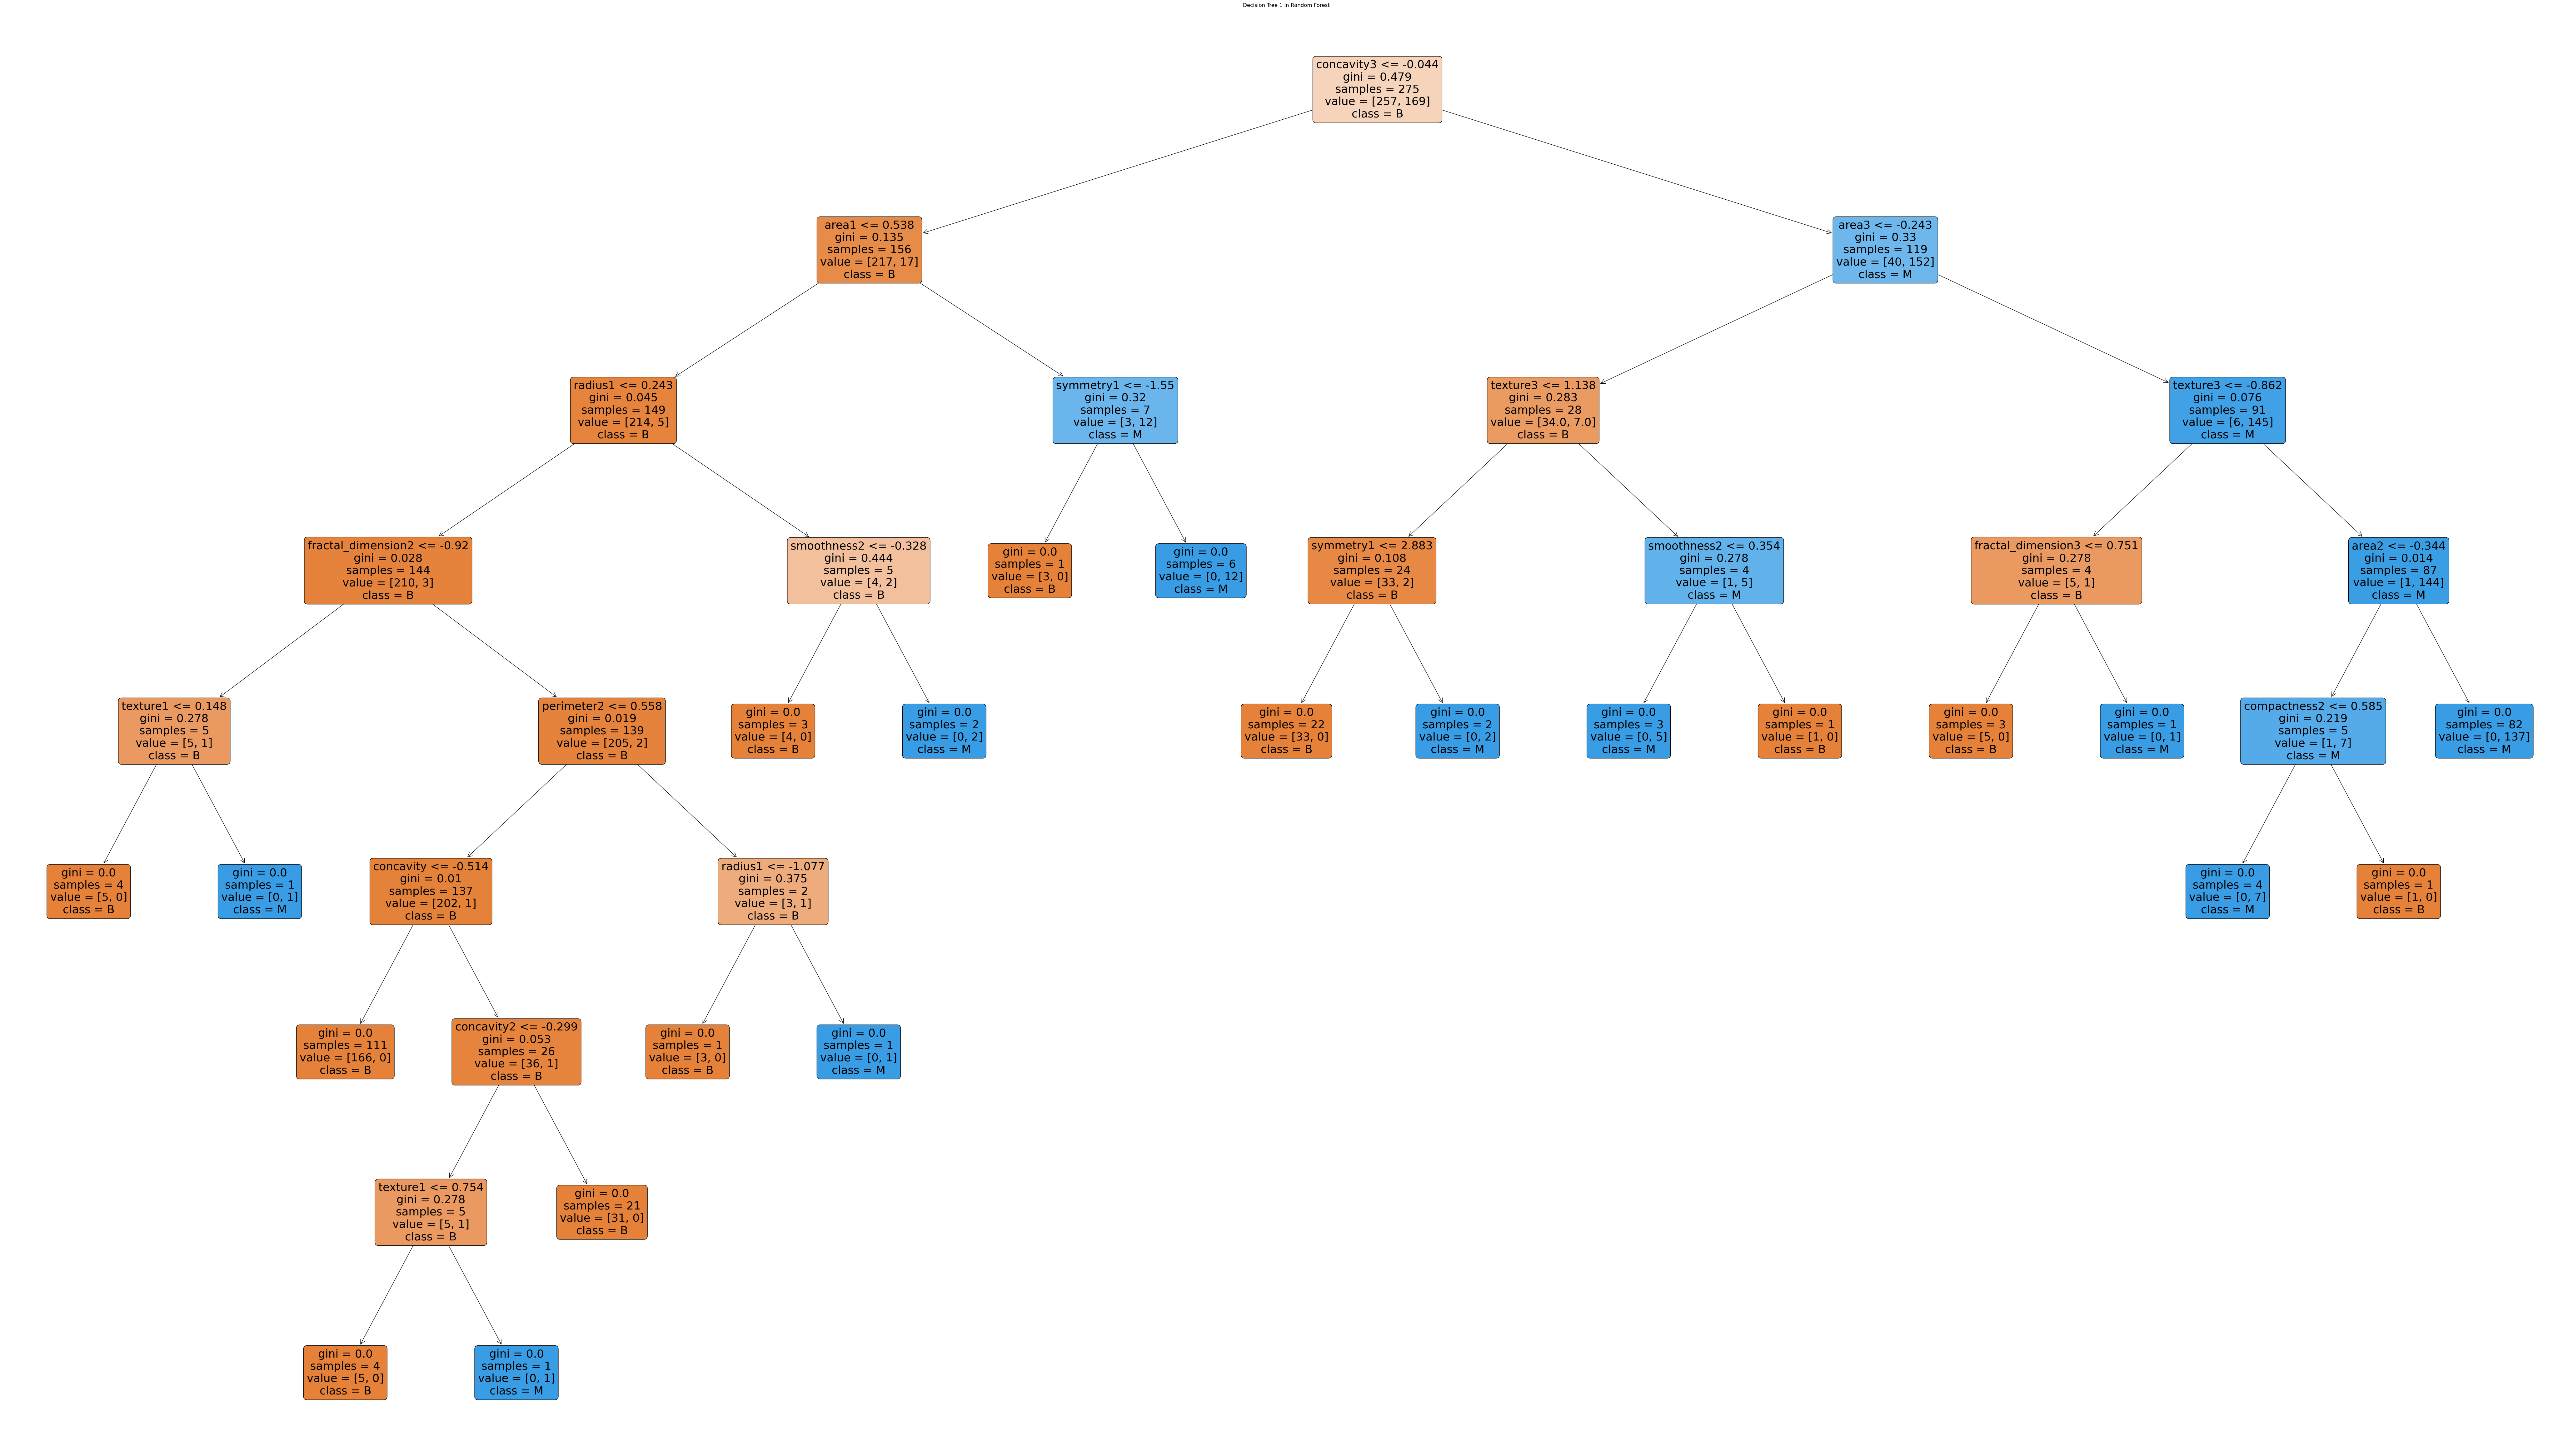

In [ ]:
from sklearn.tree import plot_tree

tree_to_plot = 0
plt.figure(figsize=(106, 60))
plot_tree(model3.estimators_[tree_to_plot], feature_names=X.columns, class_names=['B', 'M'], filled=True, rounded=True)
plt.title(f'Decision Tree {tree_to_plot + 1} in Random Forest')
plt.show()
